In [1]:
import os
from pathlib import Path
import torch
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
BATCH_SIZE = 32
data_dir = Path('../data')

train_data = datasets.FashionMNIST(root=data_dir,
                                   train=True,
                                   download=True,
                                   transform=ToTensor(),
                                   target_transform=None)
test_data = datasets.FashionMNIST(root=data_dir,
                                  train=False,
                                  download=True,
                                  transform=ToTensor())

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

print(f'DataLoader: {train_dataloader, test_dataloader}')
print(f'length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}')
print(f'length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}')

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x000001729AE28050>, <torch.utils.data.dataloader.DataLoader object at 0x000001729ADCD090>)
length of train dataloader: 1875 batches of 32
length of test dataloader: 313 batches of 32


## AutoEncoder V1

In [22]:
%load_ext autoreload
%autoreload 2

import os
import torch
from torch import nn
import utils, engine, autoencoder_model

NUM_EPOCHS = 30
LEARNING_RATE = 0.0001
WEIGHT_DECAY = 0.00001
SEED = 42
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

autoencoder_V_1 = autoencoder_model.AutoEncoder_V_1().to(device)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder_V_1.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

engine.train(model=autoencoder_V_1,
             train_dataloader=train_dataloader,
             test_dataloader=test_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             epochs=NUM_EPOCHS,
             device=device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.2173 | test_loss: 1.3639 | 
Epoch: 2 | train_loss: 1.2742 | test_loss: 1.1857 | 
Epoch: 3 | train_loss: 1.1280 | test_loss: 1.0586 | 
Epoch: 4 | train_loss: 1.0337 | test_loss: 1.0025 | 
Epoch: 5 | train_loss: 0.9908 | test_loss: 0.9683 | 
Epoch: 6 | train_loss: 0.9601 | test_loss: 0.9434 | 
Epoch: 7 | train_loss: 0.9372 | test_loss: 0.9245 | 
Epoch: 8 | train_loss: 0.9215 | test_loss: 0.9113 | 
Epoch: 9 | train_loss: 0.9087 | test_loss: 0.8997 | 
Epoch: 10 | train_loss: 0.8963 | test_loss: 0.8859 | 
Epoch: 11 | train_loss: 0.8849 | test_loss: 0.8791 | 
Epoch: 12 | train_loss: 0.8739 | test_loss: 0.8670 | 
Epoch: 13 | train_loss: 0.8642 | test_loss: 0.8569 | 
Epoch: 14 | train_loss: 0.8557 | test_loss: 0.8495 | 
Epoch: 15 | train_loss: 0.8488 | test_loss: 0.8444 | 
Epoch: 16 | train_loss: 0.8426 | test_loss: 0.8403 | 
Epoch: 17 | train_loss: 0.8375 | test_loss: 0.8333 | 
Epoch: 18 | train_loss: 0.8327 | test_loss: 0.8314 | 
Epoch: 19 | train_loss: 0.8286 | test

{'train_loss': [2.2172782150268553,
  1.2742387722333273,
  1.1280330976168316,
  1.033730085436503,
  0.9907998758951823,
  0.9600706835110983,
  0.9372216596921285,
  0.9215122676849365,
  0.9086943726539611,
  0.8962883344332377,
  0.8849230737686157,
  0.8738759881655375,
  0.8642463980038961,
  0.8557494569460551,
  0.8487641870816549,
  0.8425574098904928,
  0.8374630622545878,
  0.8327186793327331,
  0.8286476243019104,
  0.8244782183965047,
  0.8211669178326925,
  0.8175583366394042,
  0.8138170206069947,
  0.8102658445676167,
  0.8067108604749044,
  0.8031616746584574,
  0.7997378698031108,
  0.7967594600359599,
  0.7936869451204935,
  0.7906547963460286],
 'test_loss': [1.3638862752305052,
  1.185706163938053,
  1.0586473688530846,
  1.0025313555623014,
  0.9683371121510149,
  0.9433800119180649,
  0.9244976974904727,
  0.9113136044325539,
  0.8997260255935474,
  0.8858826487970809,
  0.879074570469963,
  0.8670363900379632,
  0.856943148964891,
  0.849541406090648,
  0.84439

In [23]:
import utils
utils.save_model(model=autoencoder_V_1,
                 target_dir='trained_models',
                 model_name='autoencoder_V_1.pth')

[INFO] Saving model to: trained_models\autoencoder_V_1.pth


### V1 Results

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


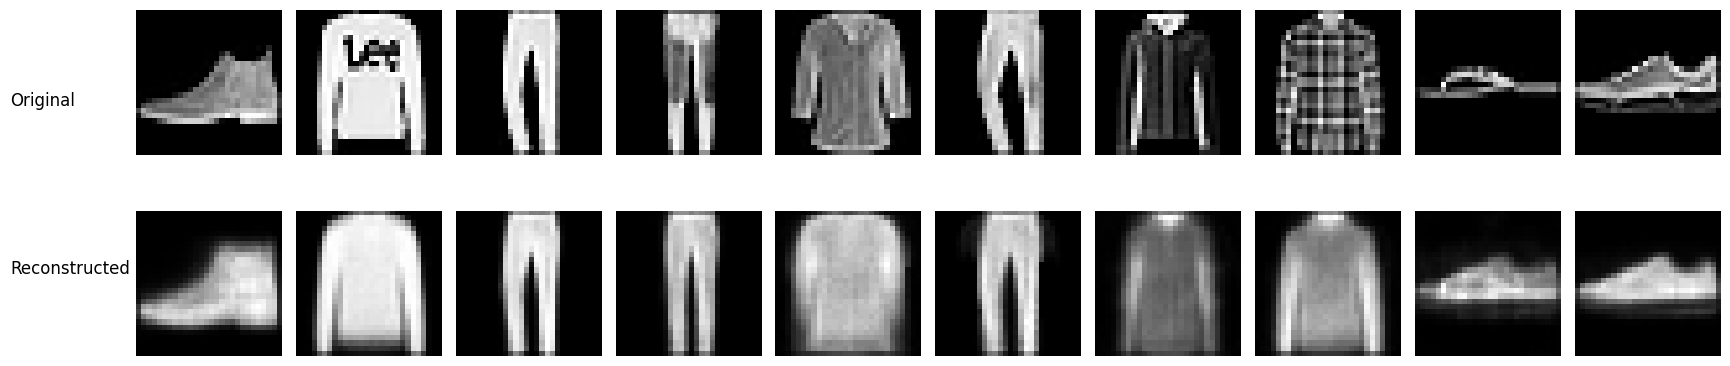

In [24]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

from plot_image import plot_reconstructed_images
plot_reconstructed_images(model=autoencoder_V_1, dataloader=test_dataloader, device=device, num_images_to_plot=10)

## AutoEncoder V2

In [4]:
%load_ext autoreload
%autoreload 2

import os
import torch
from torch import nn
import utils, engine, autoencoder_model

NUM_EPOCHS = 30
LEARNING_RATE = 0.0001
WEIGHT_DECAY = 0.00001
SEED = 42
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

autoencoder_V_2 = autoencoder_model.AutoEncoder_V_2().to(device)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder_V_2.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

engine.train(model=autoencoder_V_2,
             train_dataloader=train_dataloader,
             test_dataloader=test_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             epochs=NUM_EPOCHS,
             device=device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.6607 | test_loss: 1.6513 | 
Epoch: 2 | train_loss: 1.4298 | test_loss: 1.2965 | 
Epoch: 3 | train_loss: 1.2453 | test_loss: 1.1958 | 
Epoch: 4 | train_loss: 1.1848 | test_loss: 1.1591 | 
Epoch: 5 | train_loss: 1.1572 | test_loss: 1.1406 | 
Epoch: 6 | train_loss: 1.1385 | test_loss: 1.1245 | 
Epoch: 7 | train_loss: 1.1229 | test_loss: 1.1068 | 
Epoch: 8 | train_loss: 1.1082 | test_loss: 1.0956 | 
Epoch: 9 | train_loss: 1.0938 | test_loss: 1.0814 | 
Epoch: 10 | train_loss: 1.0811 | test_loss: 1.0705 | 
Epoch: 11 | train_loss: 1.0684 | test_loss: 1.0613 | 
Epoch: 12 | train_loss: 1.0577 | test_loss: 1.0497 | 
Epoch: 13 | train_loss: 1.0456 | test_loss: 1.0358 | 
Epoch: 14 | train_loss: 1.0367 | test_loss: 1.0253 | 
Epoch: 15 | train_loss: 1.0268 | test_loss: 1.0125 | 
Epoch: 16 | train_loss: 1.0167 | test_loss: 1.0069 | 
Epoch: 17 | train_loss: 1.0075 | test_loss: 0.9977 | 
Epoch: 18 | train_loss: 0.9994 | test_loss: 0.9910 | 
Epoch: 19 | train_loss: 0.9928 | test

{'train_loss': [2.660745760981242,
  1.4298301021575928,
  1.2452774524688721,
  1.1847891332308451,
  1.1571826548894246,
  1.1385066815058391,
  1.1229309888203938,
  1.1082423065185547,
  1.093774089272817,
  1.0810955414772034,
  1.0683558375994364,
  1.057744284025828,
  1.0455661411921184,
  1.0366795952161154,
  1.0268021950085957,
  1.0166705434481302,
  1.0074519176483154,
  0.9994373998641968,
  0.9928343263308207,
  0.9859727252642314,
  0.9795245635668437,
  0.9729595829963684,
  0.9664464087486268,
  0.9608558413187662,
  0.9557054509798686,
  0.9510576980272929,
  0.9470309708595276,
  0.942852335357666,
  0.9394590177853902,
  0.9371812632242839],
 'test_loss': [1.6512715875531156,
  1.296535083661064,
  1.195838394637306,
  1.1591342999912297,
  1.140609419764802,
  1.1244815182381165,
  1.1068059784916644,
  1.0956438638912602,
  1.0814441147322853,
  1.0704773367403415,
  1.0612976642462393,
  1.0497292030733614,
  1.0358433394005504,
  1.025283191531611,
  1.01249131

### V2 Results

In [6]:
import utils
utils.save_model(model=autoencoder_V_2,
                 target_dir='trained_models',
                 model_name='autoencoder_V_2.pth')

[INFO] Saving model to: trained_models\autoencoder_V_2.pth


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


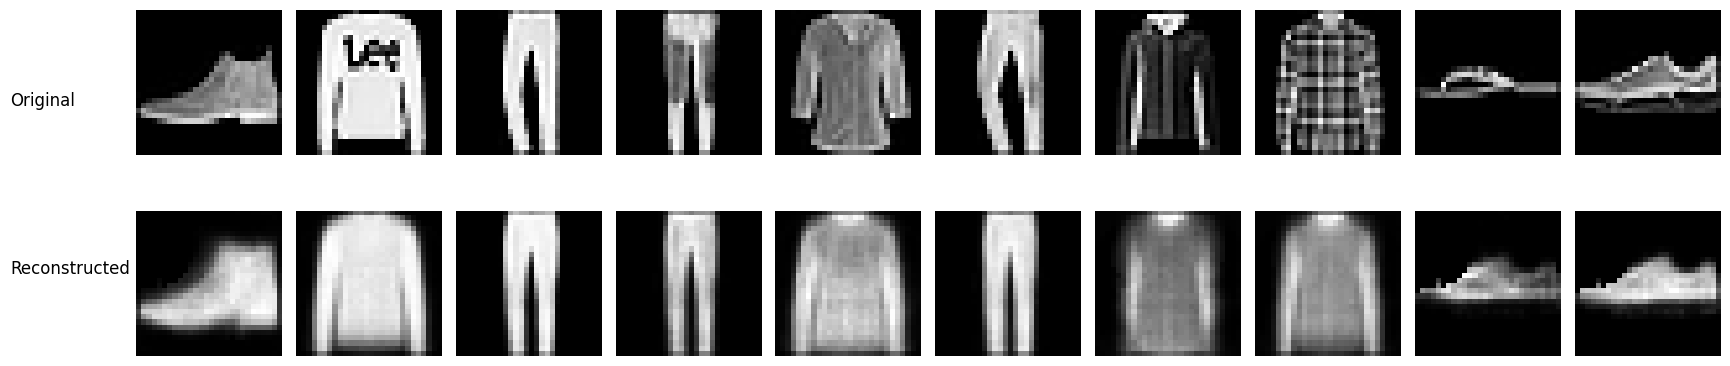

In [7]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

from plot_image import plot_reconstructed_images
plot_reconstructed_images(model=autoencoder_V_2, dataloader=test_dataloader, device=device, num_images_to_plot=10)

## AutoEncoder V3

In [8]:
%load_ext autoreload
%autoreload 2

import os
import torch
from torch import nn
import utils, engine, autoencoder_model

NUM_EPOCHS = 30
LEARNING_RATE = 0.0001
WEIGHT_DECAY = 0.00001
SEED = 42
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

autoencoder_V_3 = autoencoder_model.AutoEncoder_V_3().to(device)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder_V_3.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

engine.train(model=autoencoder_V_3,
             train_dataloader=train_dataloader,
             test_dataloader=test_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             epochs=NUM_EPOCHS,
             device=device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.8564 | test_loss: 1.1537 | 
Epoch: 2 | train_loss: 1.0203 | test_loss: 0.9212 | 
Epoch: 3 | train_loss: 0.8644 | test_loss: 0.8126 | 
Epoch: 4 | train_loss: 0.7834 | test_loss: 0.7616 | 
Epoch: 5 | train_loss: 0.7447 | test_loss: 0.7326 | 
Epoch: 6 | train_loss: 0.7223 | test_loss: 0.7152 | 
Epoch: 7 | train_loss: 0.7052 | test_loss: 0.6978 | 
Epoch: 8 | train_loss: 0.6893 | test_loss: 0.6846 | 
Epoch: 9 | train_loss: 0.6751 | test_loss: 0.6681 | 
Epoch: 10 | train_loss: 0.6607 | test_loss: 0.6546 | 
Epoch: 11 | train_loss: 0.6471 | test_loss: 0.6422 | 
Epoch: 12 | train_loss: 0.6356 | test_loss: 0.6310 | 
Epoch: 13 | train_loss: 0.6256 | test_loss: 0.6228 | 
Epoch: 14 | train_loss: 0.6164 | test_loss: 0.6140 | 
Epoch: 15 | train_loss: 0.6083 | test_loss: 0.6062 | 
Epoch: 16 | train_loss: 0.6004 | test_loss: 0.5982 | 
Epoch: 17 | train_loss: 0.5924 | test_loss: 0.5902 | 
Epoch: 18 | train_loss: 0.5850 | test_loss: 0.5826 | 
Epoch: 19 | train_loss: 0.5786 | test

{'train_loss': [1.856407513141632,
  1.020310853544871,
  0.8643893376668295,
  0.7833993335405985,
  0.7447023654301961,
  0.722289200369517,
  0.7052099905014038,
  0.6893292384147645,
  0.6750561114152273,
  0.6607039897282918,
  0.6471198789437612,
  0.6356383299986521,
  0.6255541373411815,
  0.6164472461223602,
  0.6082876053174336,
  0.6003917862892151,
  0.5924174999872843,
  0.5850021775722504,
  0.5786246084054311,
  0.573018549156189,
  0.5680985095659892,
  0.5632301269372304,
  0.558821202993393,
  0.5544500690778097,
  0.5499054001331329,
  0.5453398712793986,
  0.5403095573107402,
  0.5349512886683147,
  0.529543191242218,
  0.5245739987373352],
 'test_loss': [1.1537255267746531,
  0.9211986464814256,
  0.8125927754865286,
  0.7615561976600379,
  0.7326246971329942,
  0.715195491576728,
  0.6978236990995681,
  0.6846094212402551,
  0.668095654953783,
  0.6546416223620455,
  0.6421670260520789,
  0.6309754462859121,
  0.6228196679974516,
  0.614021464182546,
  0.606223894

### V3 Results

In [9]:
import utils
utils.save_model(model=autoencoder_V_3,
                 target_dir='trained_models',
                 model_name='autoencoder_V_3.pth')

[INFO] Saving model to: trained_models\autoencoder_V_3.pth


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


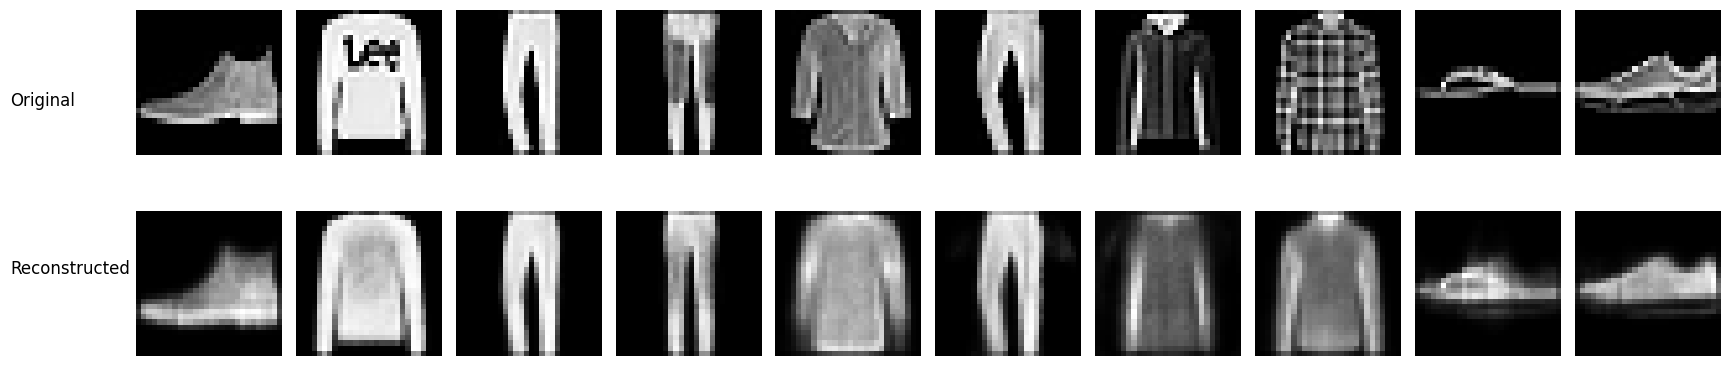

In [10]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

from plot_image import plot_reconstructed_images
plot_reconstructed_images(model=autoencoder_V_3, dataloader=test_dataloader, device=device, num_images_to_plot=10)